# 1. Introduction

## Business Objectives

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## Housing Price Prediction

US-based housing company Surprise Housing is expanding into the Australian market using data analytics. They collect data from Australian house sales to buy properties below market value and sell them for a profit. To assess potential investments, a regression model with regularization is needed to predict property values accurately. This model will address two key questions: identifying significant variables affecting house prices and assessing their predictive power. Additionally, the optimal lambda values for ridge and lasso regression will be determined to fine-tune the model's performance. This analysis aims to help Surprise Housing make informed decisions about investing in Australian properties and maximize their returns in the new market.






## Importing python packages

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Importing Dataset

In [166]:
df = pd.read_csv("train_advanced.csv")

In [167]:
df.shape

(1460, 81)

In [168]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 columns and 1460 rows in the dataset

## 3. Data Cleaning and Validation

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking duplicate data in the dataset

In [170]:
df.duplicated().sum()

0

### Removing rows that are missing more than 40% data 

In [171]:
removecols=[]
for i in df.columns:
    if(df[i].isnull().mean()*100>=40.00):
        removecols.append(i)
        

print(removecols)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [173]:
df.drop(removecols,axis=1,inplace=True)

In [175]:
#As mentioned in the Data Dictionary NA value means it is not present and thus we can replace it with none
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [176]:
# We will replace the null with median for LotFrontage MasVnrArea and GarageYrBlt columns
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

In [178]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [179]:
100*df.isnull().mean().sort_values(ascending=False)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
               ... 
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
SalePrice       0.0
Length: 76, dtype: float64

In [180]:
df=df.drop('Id',axis='columns')

### Rounding off the columns to 2 decimal places

In [181]:
df = df.round(decimals = 2)

In [182]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [184]:
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

#%%
#Lets drop these extra columns :
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df.drop(extraCols,axis=1,inplace=True)
df.shape# verifying the shape of the dataset

(1460, 65)

### Checking the unique data of each Column

In [188]:
for i in df.columns :
    print(i,"\n")
    print(df[i].value_counts(),"\n")
    print("****************************************")

MSSubClass 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

****************************************
MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

****************************************
LotFrontage 

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

****************************************
LotArea 

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 

****************************************
Street 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

****************************************
LotShape

In [189]:
ninty_percent = 1460*0.90 #1460 is the total number of rows
ninty_percent

1314.0

In [191]:
dropCols = [] 
for i in df.columns :
    if df[i].value_counts().max() >= ninty_percent:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [193]:
df.drop(dropCols,axis=1,inplace=True)
df.shape#

(1460, 50)

In [199]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [201]:
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [204]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [206]:
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [208]:
len(df.index)
len(df.index)/1460

1.0

# 6. Exploratory Data Analysis ( EDA )

In [209]:
data_numeric = df.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
0,60,65.0,8450,7,5,2003,196.0,150,856,1710,...,548,2,2008,208500,2416,3.5,61,5,5.0,5
1,20,80.0,9600,6,8,1976,0.0,284,1262,1262,...,460,5,2007,181500,2240,2.5,298,31,31.0,31
2,60,68.0,11250,7,5,2001,162.0,434,920,1786,...,608,9,2008,223500,2272,3.5,42,7,7.0,6
3,70,60.0,9550,7,5,1915,0.0,540,756,1717,...,642,2,2006,140000,1933,2.0,307,91,8.0,36
4,60,84.0,14260,8,5,2000,350.0,490,1145,2198,...,836,12,2008,250000,2853,3.5,276,8,8.0,8


## 6.1 Univariate Analysis of the Catagorical columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

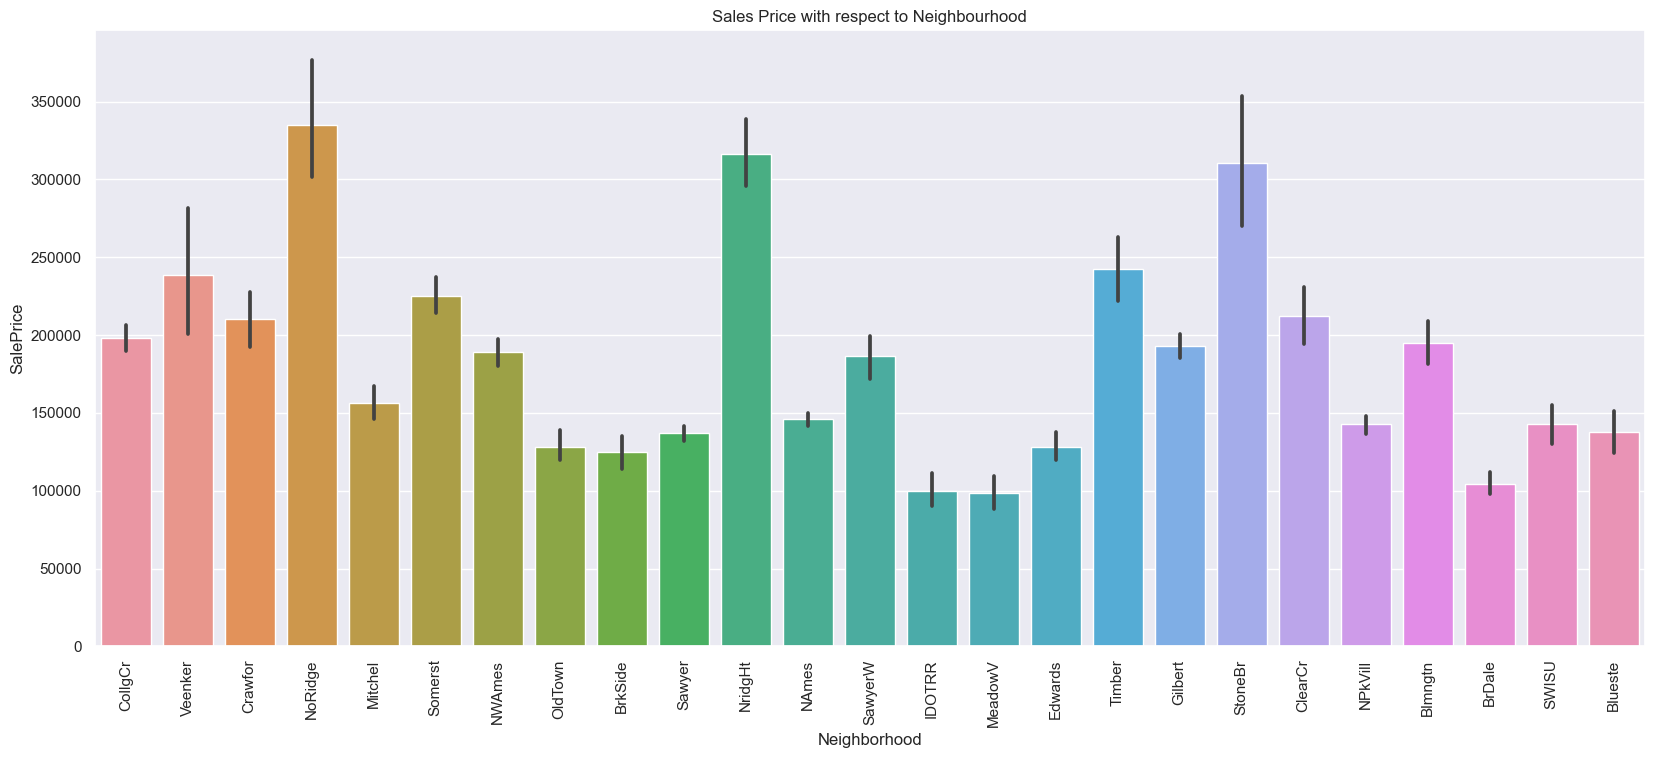

In [211]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

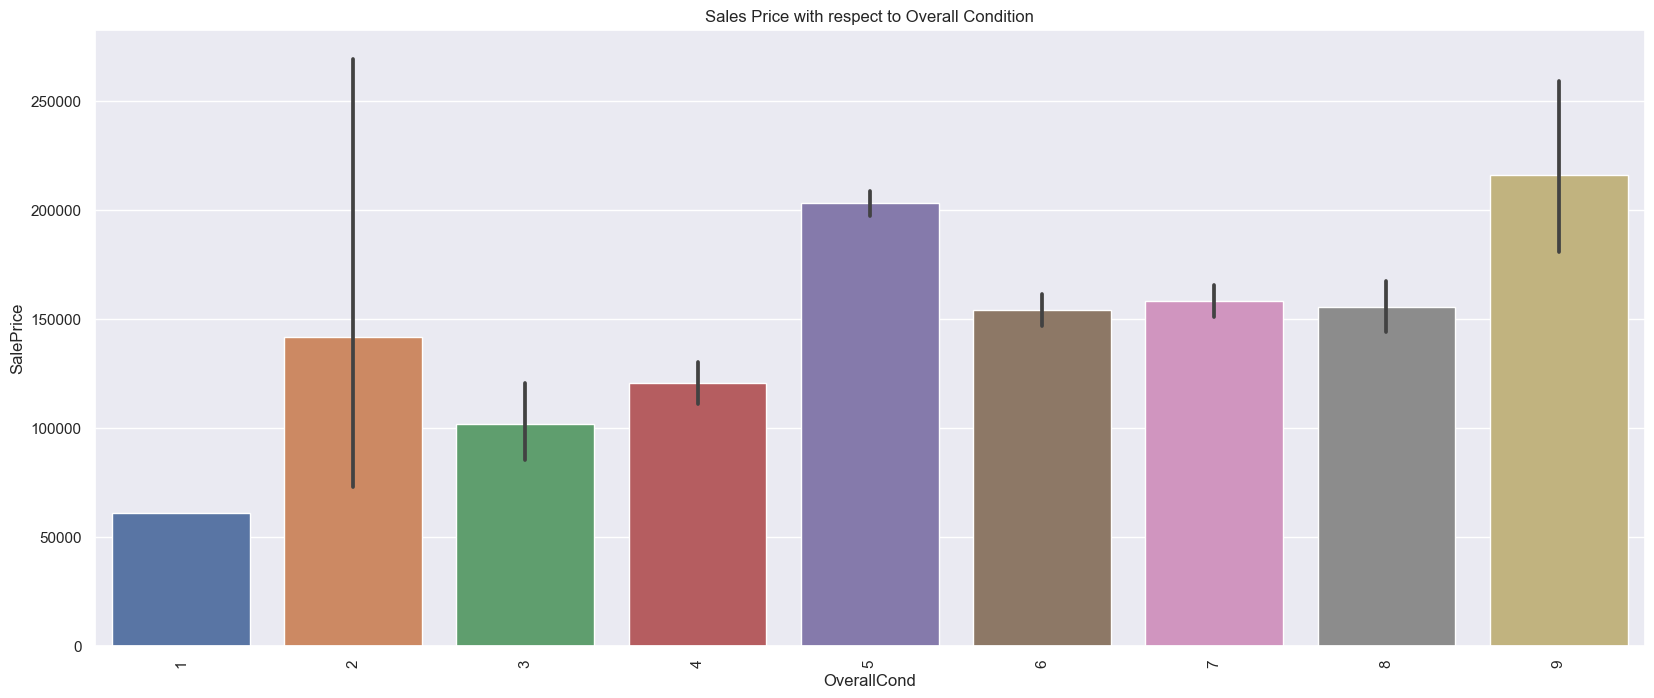

In [212]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

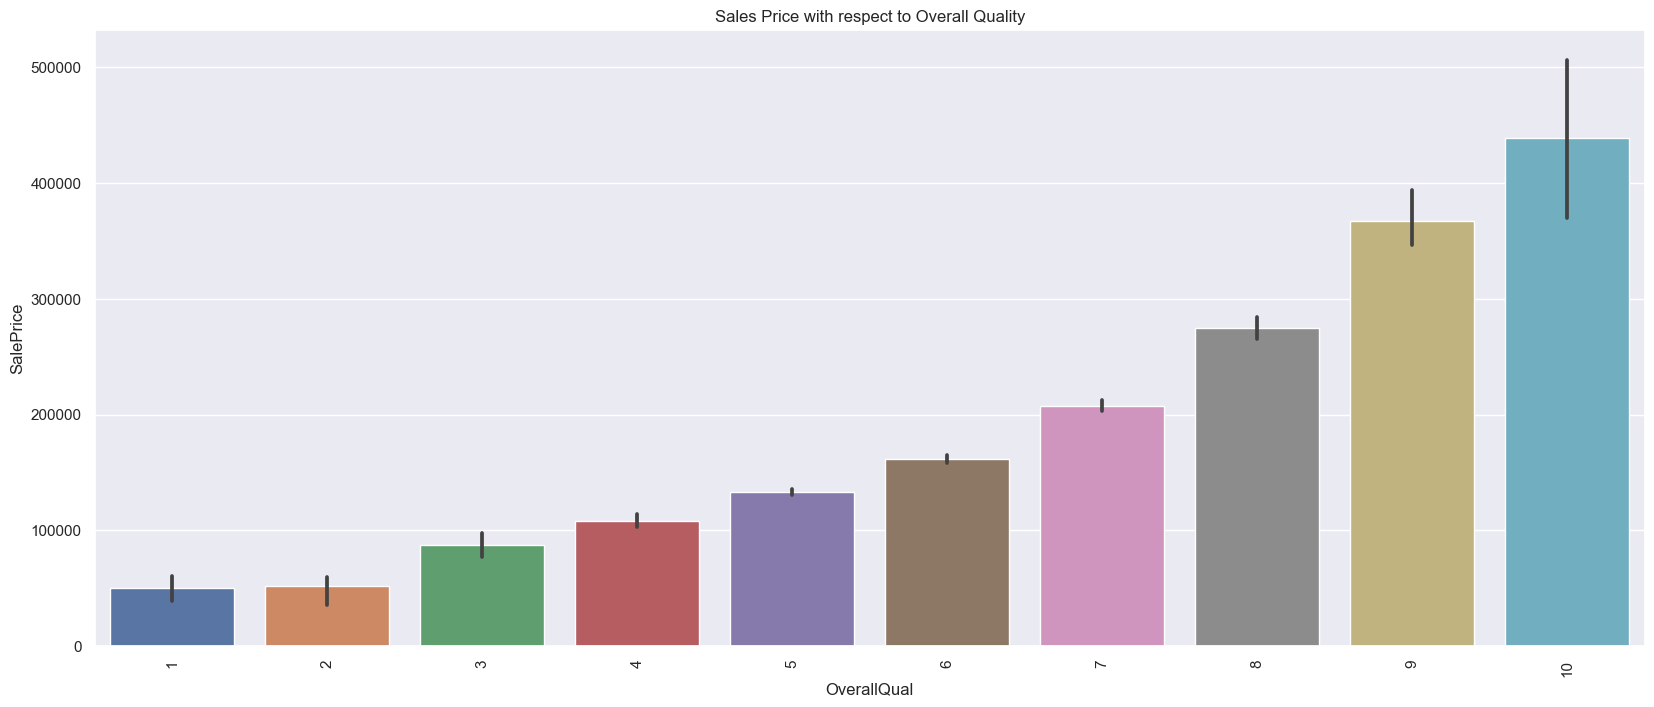

In [213]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

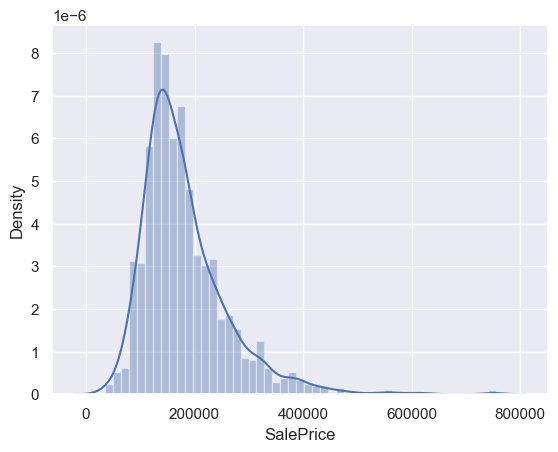

In [214]:
sns.distplot(df['SalePrice'])

## Checking correlation with other attributes

In [215]:
cor = df.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.023573,-0.140759,-0.238518,0.074853,...,-0.098672,-0.013585,-0.021407,-0.084284,-0.006936,0.151048,-0.034807,-0.028746,-0.082451,-0.041968
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.178469,0.124098,0.363472,0.368007,...,0.323511,0.010451,0.006380,0.334771,0.382666,0.200381,0.147397,-0.116223,-0.062544,-0.082957
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.103321,-0.002618,0.260833,0.263116,...,0.180403,0.001205,-0.014261,0.263843,0.327672,0.204764,0.185256,-0.014832,0.025036,-0.014709
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.407252,0.308159,0.537808,0.593007,...,0.562022,0.070815,-0.027347,0.790982,0.533425,0.541063,0.306097,-0.572629,-0.514933,-0.552570
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,-0.125694,-0.136841,-0.171098,-0.079686,...,-0.151521,-0.003511,0.043950,-0.077856,-0.074560,-0.174032,0.035280,0.377325,0.308222,-0.070931
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.311600,0.149040,0.391452,0.199010,...,0.478954,0.012398,-0.013618,0.522897,0.283450,0.524298,0.096577,-0.999036,-0.776711,-0.593868
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,1.000000,0.113862,0.360067,0.388052,...,0.370884,-0.006723,-0.008317,0.472614,0.406854,0.314248,0.162687,-0.311479,-0.244519,-0.177105
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.149040,0.113862,1.000000,0.415360,0.240257,...,0.183303,0.034888,-0.041258,0.214479,-0.174117,-0.104496,0.048726,-0.150619,-0.187598,-0.183830
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.391452,0.360067,0.415360,1.000000,0.454868,...,0.486665,0.013196,-0.014969,0.613581,0.640590,0.414468,0.290030,-0.391498,-0.309726,-0.292096
GrLivArea,0.074853,0.368007,0.263116,0.593007,-0.079686,0.199010,0.388052,0.240257,0.454868,1.000000,...,0.468997,0.050240,-0.036526,0.708624,0.791122,0.595169,0.381182,-0.200302,-0.221474,-0.289805


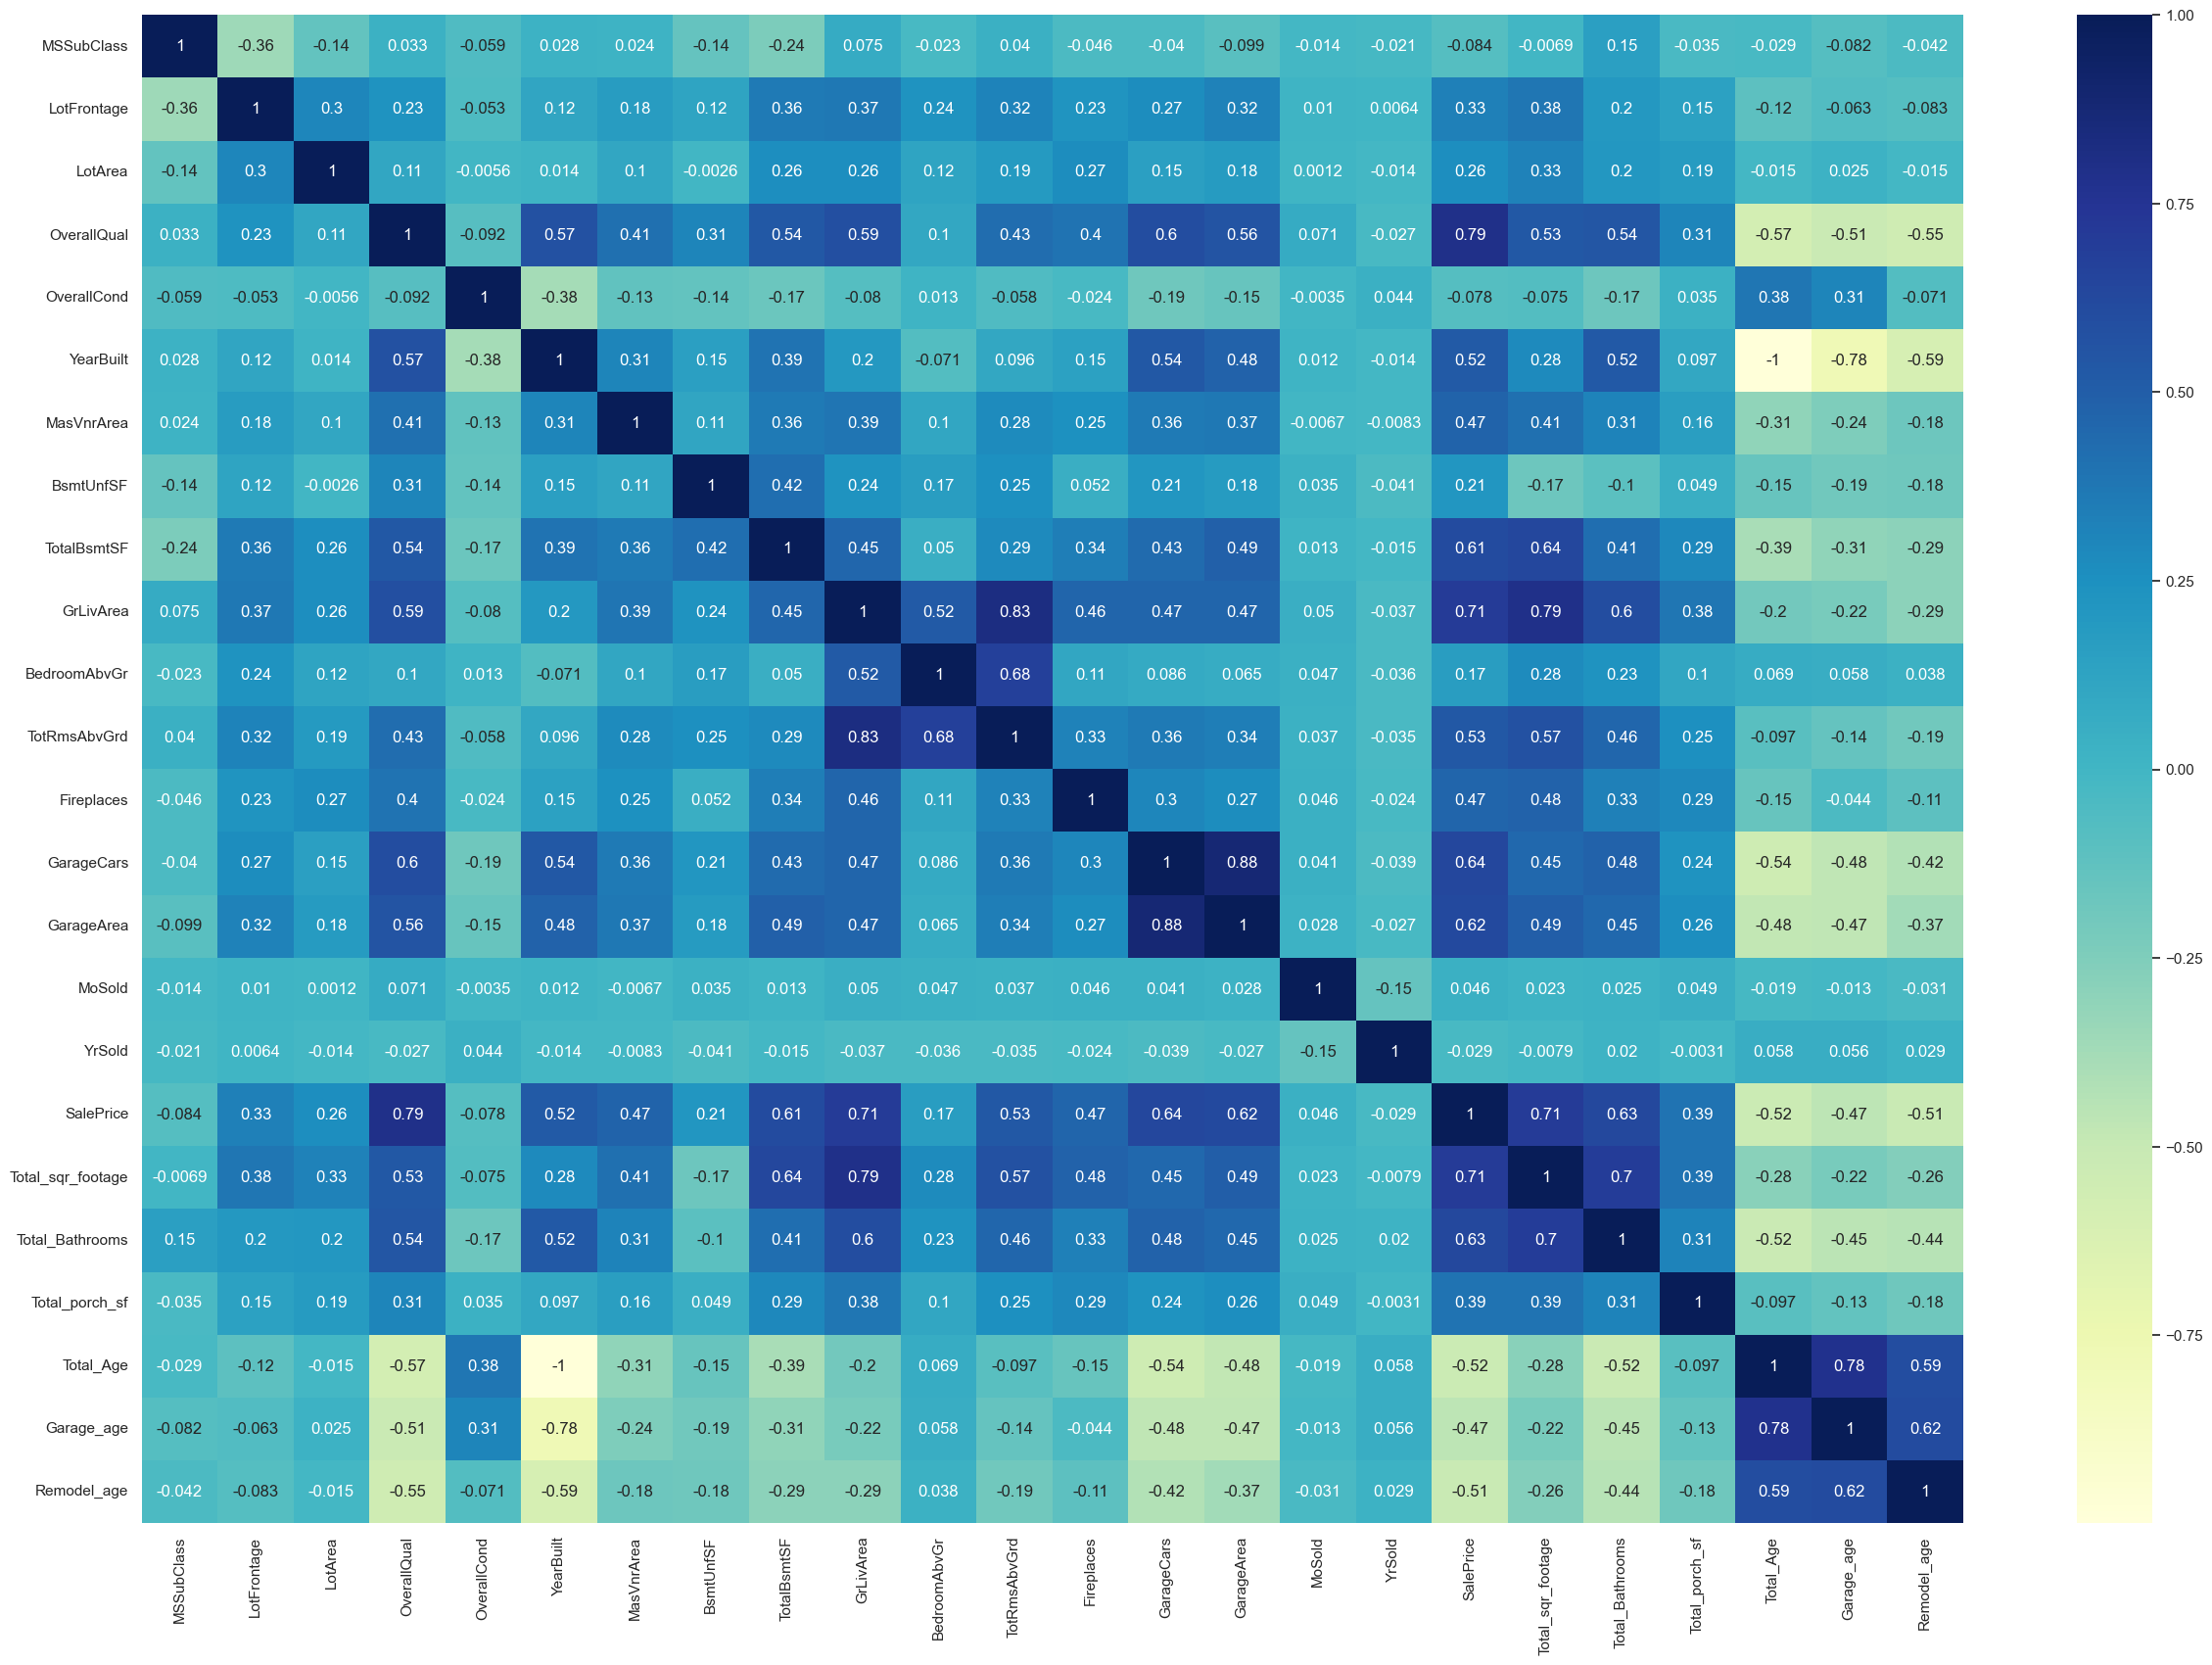

In [216]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### We can see that some of the variables are correlated

#### Before dropping these columns, we will first check their predictive power

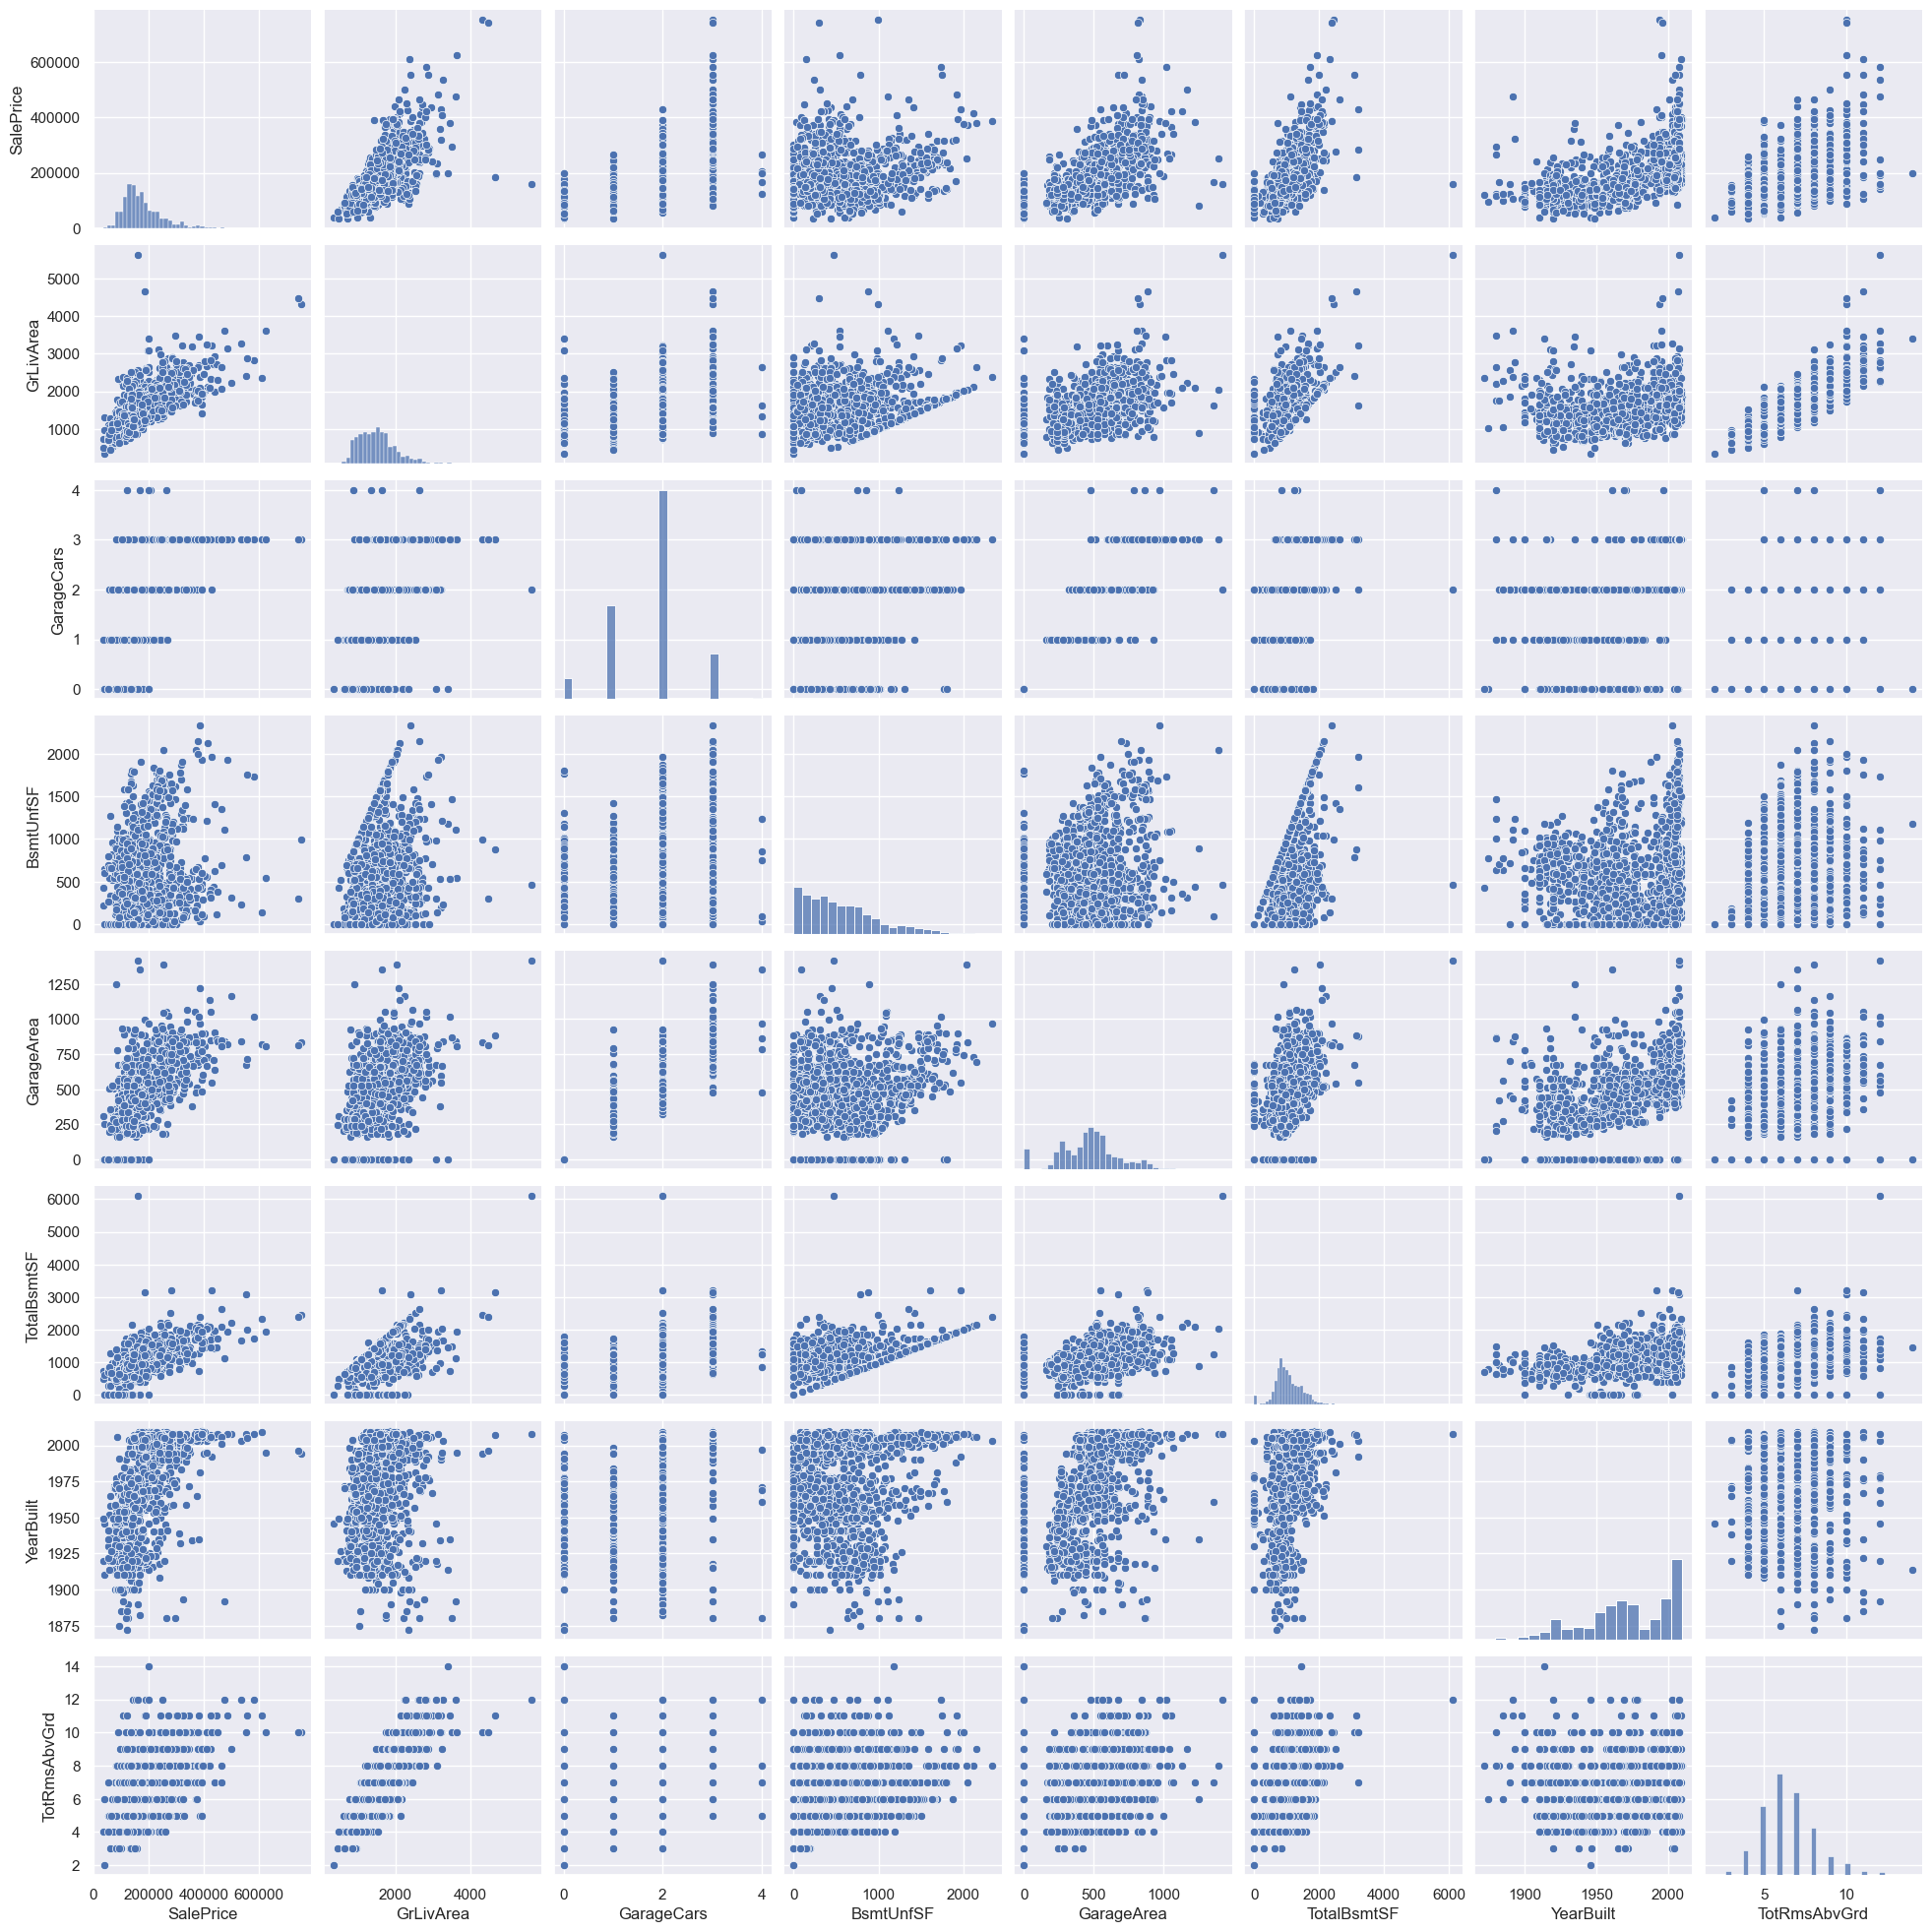

In [218]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd']
sns.pairplot(df[cols], size = 2.5)
plt.show()

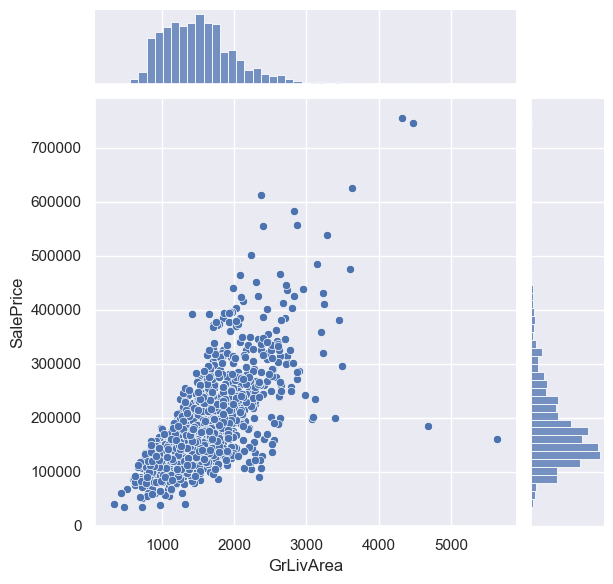

In [219]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

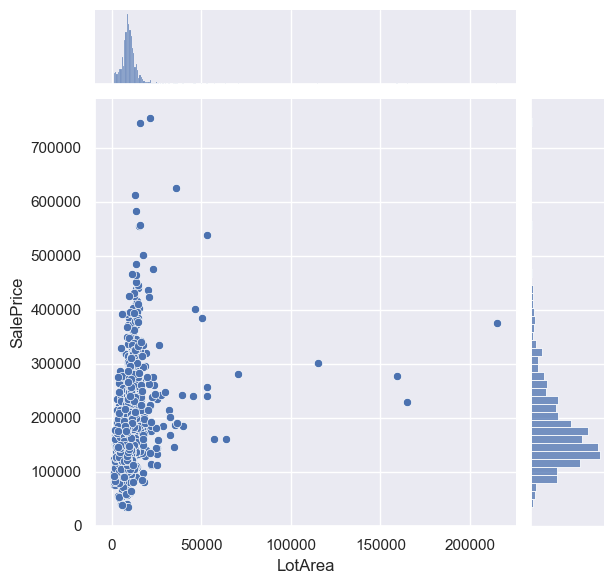

In [220]:
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

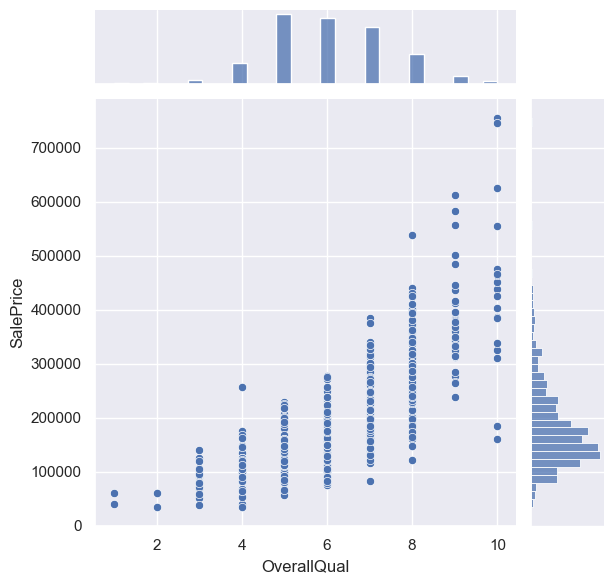

In [221]:
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

###  Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further 

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
#%%


In [225]:
#Lets change the datatype of categorical columns from object to category
Cat_cols = []
for i in df.columns :
    if df[i].dtype == "object":
        df[i]=df[i].astype('category')
        Cat_cols.append(i)

print(Cat_cols)
df.info()

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         1460 non-null   int64   
 1   MSZoning           1460 non-null   category
 2   LotFrontage        1460 non-null   float64 
 3   LotArea            1460 non-null   int64   
 4   LotShape           1460 non-null   category
 5   LandContour        1460 non-null   category
 6   LotConfig          1460 non-null   category
 7   Neighborhood       1460 non-null   category
 8   Condition1         

In [227]:
df = pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 509.1 KB


In [103]:
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [229]:
df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (1021, 189)
The Size of Test data is (439, 189)


## Scaling of Features

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
Num_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [232]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])

In [233]:
df_train[Num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226306,0.166332,0.042162,0.565894,0.572600,0.719719,0.065306,0.241329,0.173813,0.207562,...,0.332860,0.480812,0.454701,0.202346,0.137635,0.245054,0.194732,0.268364,0.270689,0.390729
std,0.254701,0.075653,0.048221,0.155515,0.136515,0.219718,0.117088,0.192097,0.075139,0.102200,...,0.149657,0.249871,0.334814,0.109845,0.073908,0.156454,0.166817,0.223133,0.224118,0.337590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.027937,0.444444,0.500000,0.594203,0.000000,0.092466,0.129787,0.133935,...,0.232722,0.272727,0.250000,0.131371,0.090089,0.200000,0.045210,0.058824,0.065421,0.081967
50%,0.176471,0.164384,0.037555,0.555556,0.500000,0.731884,0.000000,0.197774,0.162684,0.197540,...,0.338505,0.454545,0.500000,0.175115,0.124396,0.200000,0.176534,0.250000,0.252336,0.245902
75%,0.294118,0.195205,0.046943,0.666667,0.625000,0.927536,0.098750,0.345034,0.215057,0.256726,...,0.406206,0.636364,0.750000,0.250104,0.174972,0.300000,0.287406,0.397059,0.420561,0.688525
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [234]:
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train

In [235]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 188 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(165)
memory usage: 356.0 KB


In [236]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1021 entries, 318 to 792
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1021 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


## 8. Training the Model

In [237]:
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.model_selection import GridSearchCV #finding the optimal parameter values
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error


In [238]:
#Fit the Model
lr = LinearRegression()
#Since we have 147 columns in the X_train, lets select only half of it , say 94 using RFE
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', False, 38),
 ('BedroomAbvGr', False, 79),
 ('TotRmsAbvGrd', False, 75),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('MoSold', False, 61),
 ('YrSold', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', False, 26),
 ('Remodel_age', False, 42),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 86),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 68),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 23),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', True, 1)

In [239]:
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'Fireplaces',
       'GarageCars', 'GarageArea', 'YrSold', 'Total_sqr_footage',
       'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'E

In [240]:
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'MoSold', 'Garage_age',
       'Remodel_age', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Ext

In [241]:
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to form the equation y = mx + c
X_train_rfe.shape

(1021, 95)

In [242]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [243]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     86.68
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:32:20   Log-Likelihood:                 1921.7
No. Observations:                1021   AIC:                            -3671.
Df Residuals:                     935   BIC:                            -3247.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

In [245]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
46,Exterior1st_AsphShn,inf
90,GarageQual_none,inf
48,Exterior1st_CBlock,inf
52,Exterior2nd_AsphShn,inf
17,Total_Age,inf
...,...,...
45,RoofStyle_Shed,1.06
69,Foundation_Wood,1.05
0,const,0.00
56,Exterior2nd_Other,NaN


# 9. Model Prediction and Evaluation

## 9.1 Create X_test and y_test

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 509.1 KB


In [247]:
Num_cols = []
for i in df.columns :
    if df[i].dtype != "uint8":
        Num_cols.append(i)

print(Num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [248]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df[Num_cols] = Scaler.fit_transform(df[Num_cols])

In [249]:
y_test = df.pop('SalePrice') #This contains only the Target Variable
X_test = df

## 9.2 Ridge - Regularization

In [275]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
18,7.0,-0.022705,-0.026515,1
17,6.0,-0.022520,-0.026518,2
19,8.0,-0.022890,-0.026529,3
16,5.0,-0.022332,-0.026560,4
20,9.0,-0.023070,-0.026568,5
21,10.0,-0.023248,-0.026618,6
15,4.0,-0.022142,-0.026652,7
14,3.0,-0.021946,-0.026812,8
13,2.0,-0.021732,-0.027076,9
22,20,-0.024900,-0.027537,10


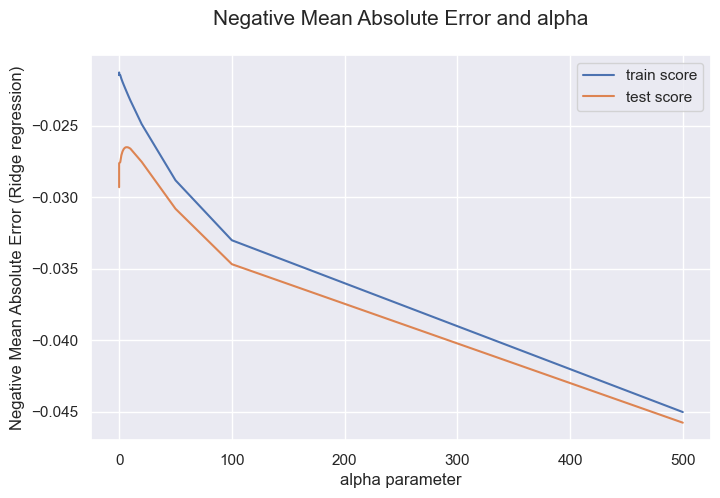

In [277]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [278]:
ridge_model_cv.best_params_

{'alpha': 7.0}

In [300]:
alpha = 7.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.71171141e-02, -2.12595729e-03,  2.55487567e-02,  8.60431301e-02,
        3.14044366e-02,  5.84117623e-03,  3.49335246e-02,  2.31803689e-02,
        2.32352543e-02,  8.42462753e-02,  1.40832263e-02,  4.89330737e-02,
        3.06852581e-02,  4.41824022e-02,  2.81529356e-02, -1.85218574e-03,
       -4.40381970e-03,  4.97743477e-02,  5.53075127e-02,  2.17245035e-02,
       -6.05659999e-03,  1.33596853e-03, -1.59158898e-02,  8.21291711e-03,
        7.55269630e-03,  1.15289220e-02,  4.21100923e-03,  4.33086371e-03,
       -1.42468772e-02,  2.76903203e-04,  1.74405456e-02,  2.00223557e-02,
        1.72987169e-02,  1.26953794e-02, -1.66613406e-02, -5.15754046e-03,
       -2.84380721e-03, -1.33401129e-03, -4.96080182e-03, -5.64071501e-03,
        1.30379947e-03, -9.15525235e-03,  3.01050431e-02, -2.78002126e-02,
       -1.24318928e-02, -1.58335670e-02, -7.40451698e-03, -2.12182877e-02,
       -1.57253104e-02, -4.53519170e-04, -6.32162185e-03,  6.70778828e-02,
        3.37356395e-02, -

In [301]:
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.001598677057630197


In [302]:
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.8757823864193321


In [303]:
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8685568097075113


#### As we can clearly the that the mean square error is slightly increasing with the increase or decrease of alpha value, so we can consider alpha = 2 as the best value

In [283]:
house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

,Features,Coefficient
0,MSSubClass,-0.0275
1,LotFrontage,-0.0224
2,LotArea,0.0549
3,OverallQual,0.1067
4,OverallCond,0.0420
...,...,...
183,SaleCondition_AdjLand,0.0118
184,SaleCondition_Alloca,0.0146
185,SaleCondition_Family,-0.0013
186,SaleCondition_Normal,0.0055


In [284]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0275,
 'LotFrontage': -0.0224,
 'LotArea': 0.0549,
 'OverallQual': 0.1067,
 'OverallCond': 0.042,
 'YearBuilt': 0.0057,
 'MasVnrArea': 0.0399,
 'BsmtUnfSF': 0.0237,
 'TotalBsmtSF': 0.0084,
 'GrLivArea': 0.143,
 'BedroomAbvGr': 0.0097,
 'TotRmsAbvGrd': 0.0421,
 'Fireplaces': 0.0219,
 'GarageCars': 0.0564,
 'GarageArea': 0.0152,
 'MoSold': -0.0024,
 'YrSold': -0.0042,
 'Total_sqr_footage': 0.0723,
 'Total_Bathrooms': 0.063,
 'Total_porch_sf': 0.0194,
 'Total_Age': -0.0059,
 'Garage_age': 0.0073,
 'Remodel_age': -0.011,
 'MSZoning_FV': 0.014,
 'MSZoning_RH': 0.0181,
 'MSZoning_RL': 0.0188,
 'MSZoning_RM': 0.0162,
 'LotShape_IR2': 0.0043,
 'LotShape_IR3': -0.0216,
 'LotShape_Reg': 0.0017,
 'LandContour_HLS': 0.0266,
 'LandContour_Low': 0.0307,
 'LandContour_Lvl': 0.0248,
 'LotConfig_CulDSac': 0.0116,
 'LotConfig_FR2': -0.0199,
 'LotConfig_FR3': -0.0102,
 'LotConfig_Inside': -0.0032,
 'Neighborhood_Blueste': -0.0039,
 'Neighborhood_BrDale': -0.0101,
 'Neighborhood_BrkSide'

In [285]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [286]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.1067
8,Total_sqr_footage,True,1,0.0723
6,GarageCars,True,1,0.0564
0,LotArea,True,1,0.0549
2,OverallCond,True,1,0.0420
4,BsmtUnfSF,True,1,0.0237
5,TotalBsmtSF,True,1,0.0084
3,YearBuilt,True,1,0.0057
18,GarageType_none,True,1,0.0040
19,GarageFinish_none,True,1,0.0040


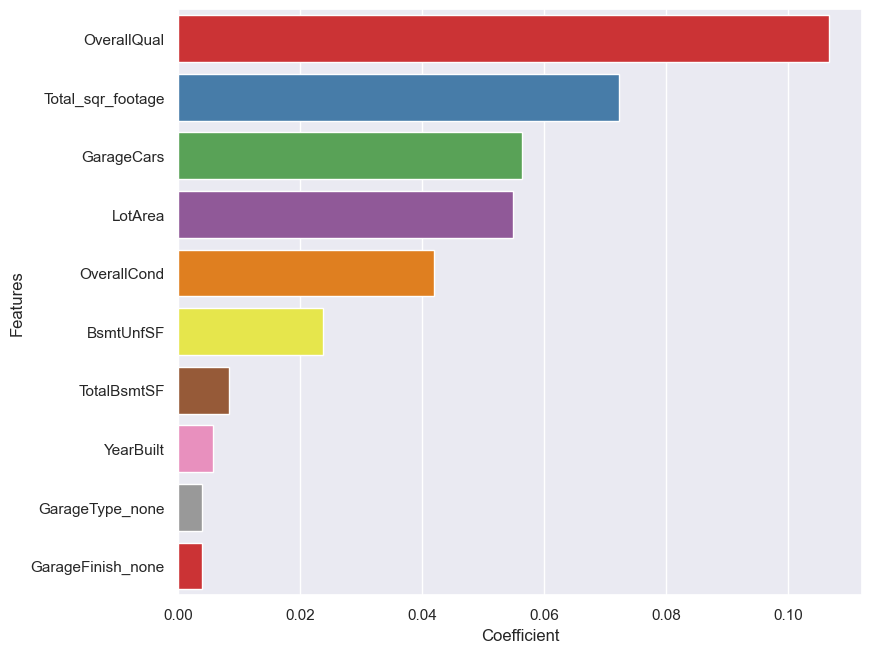

In [287]:
plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## 9.3 Lasso - Regularization

In [288]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [289]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.022276,-0.025427,1
0,0.0001,-0.021628,-0.025571,2
2,0.0003,-0.023048,-0.025805,3
3,0.0004,-0.023894,-0.026386,4
4,0.0005,-0.024692,-0.026992,5
5,0.001,-0.027262,-0.029002,6
6,0.002,-0.031612,-0.033035,7
7,0.003,-0.036176,-0.037246,8
8,0.004,-0.040162,-0.041076,9
9,0.005,-0.044028,-0.044796,10


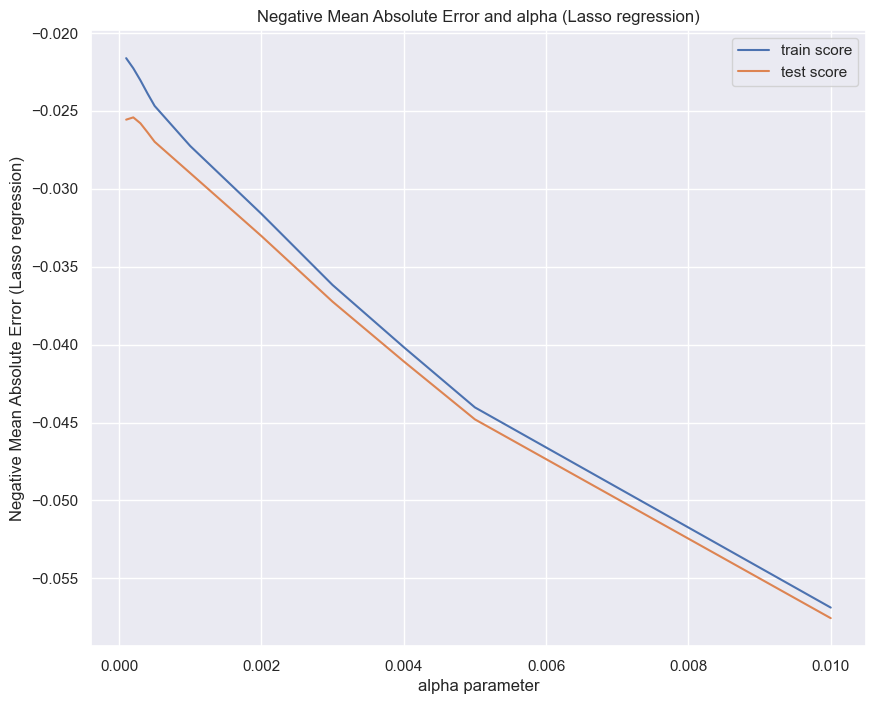

In [290]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [291]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [292]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-3.63601790e-02, -1.08963186e-02,  4.82307838e-02,  1.27579928e-01,
        4.73935241e-02,  0.00000000e+00,  2.62280997e-02,  1.92141202e-03,
        0.00000000e+00,  3.15330817e-01,  0.00000000e+00,  9.38644127e-04,
        1.51090278e-02,  5.79640363e-02,  0.00000000e+00, -1.59701698e-03,
       -2.31674282e-03,  0.00000000e+00,  5.90066256e-02,  1.37700893e-02,
       -1.38187067e-02, -0.00000000e+00, -7.83710061e-03,  0.00000000e+00,
        1.02696491e-03,  7.33080123e-03, -0.00000000e+00,  3.52128333e-03,
       -1.63587511e-02,  9.25617845e-04,  2.37182503e-02,  2.90813111e-02,
        2.35821075e-02,  1.20554924e-02, -1.35328556e-02, -0.00000000e+00,
       -5.35935679e-04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.80576960e-03,  0.00000000e+00,  3.49313995e-02, -2.34044998e-02,
       -0.00000000e+00, -6.91632124e-03,  0.00000000e+00, -1.45170649e-02,
       -1.03284779e-02,  0.00000000e+00, -1.28031053e-03,  7.59902941e-02,
        4.71703362e-02, -

In [293]:
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0014889791887579451


In [294]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.885570694928504
The r2 value of train data is  0.885570694928504


In [295]:
house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

,Features,Coefficient
0,MSSubClass,-0.0364
1,LotFrontage,-0.0109
2,LotArea,0.0482
3,OverallQual,0.1276
4,OverallCond,0.0474
...,...,...
101,SaleType_ConLD,0.0005
102,SaleType_New,0.0071
103,SaleType_WD,-0.0006
104,SaleCondition_Normal,0.0036


In [296]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.036360179039126916,
 'LotFrontage': -0.010896318596338554,
 'LotArea': 0.04823078382930532,
 'OverallQual': 0.1275799281352845,
 'OverallCond': 0.047393524077796595,
 'YearBuilt': 0.0,
 'MasVnrArea': 0.026228099661453102,
 'BsmtUnfSF': 0.0019214120228823873,
 'TotalBsmtSF': 0.0,
 'GrLivArea': 0.3153308167807275,
 'BedroomAbvGr': 0.0,
 'TotRmsAbvGrd': 0.0009386441274572917,
 'Fireplaces': 0.015109027779573243,
 'GarageCars': 0.05796403628156428,
 'GarageArea': 0.0,
 'MoSold': -0.0015970169774515272,
 'YrSold': -0.0023167428211819207,
 'Total_sqr_footage': 0.0,
 'Total_Bathrooms': 0.05900662558072514,
 'Total_porch_sf': 0.013770089284482505,
 'Total_Age': -0.013818706661607482,
 'Garage_age': -0.0,
 'Remodel_age': -0.007837100612672888,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': 0.0010269649096314205,
 'MSZoning_RL': 0.007330801225772189,
 'MSZoning_RM': -0.0,
 'LotShape_IR2': 0.003521283330922043,
 'LotShape_IR3': -0.016358751050729994,
 'LotShape_Reg': 0.0009256178450687984

In [297]:
X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [298]:

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
4,GrLivArea,True,1,0.315331
2,OverallQual,True,1,0.127580
10,Neighborhood_NoRidge,True,1,0.075990
6,Total_Bathrooms,True,1,0.059007
5,GarageCars,True,1,0.057964
1,LotArea,True,1,0.048231
3,OverallCond,True,1,0.047394
11,Neighborhood_StoneBr,True,1,0.037432
9,Neighborhood_Crawfor,True,1,0.034931
19,SaleType_ConLD,True,1,0.000516


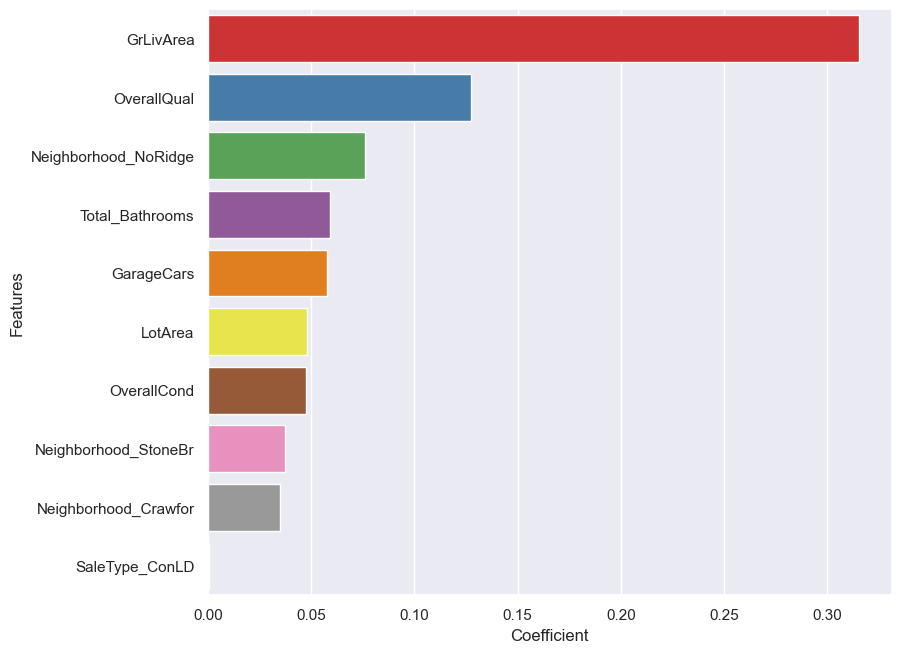

In [299]:
plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [304]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8775761659208481


# 10. Conclusion :

### The optimal value of LAMBDA we got in case of Ridge and Lasso is :
- Lasso - **0.001**
- Ridge - **7.0**


### The r2 value we got in case of Ridge and Lasso is:
- Ridge - Train = **0.87** , Test = **0.86**
- Lasso - Train = **0.88** , Test = **0.87**

- We can clearly observe that the Mean Squared Error of Lasso is slightly lower than that of Ridge.
- Also since Lasso helps in feature reduction (as the coefficient value of one of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients thus **Lasso has a better edge over Ridge.**

### Thus based LASSO Regularization the TOP 5 Predicted variables are :

1. **OverallQual** - With the increase of the overall material and finish of the house, the house price also increases.
2. **GrLivArea** - With the increase of size of the living area square feet, the house price also increases.
3. **YearBuild** - With the increase of age of the house, the price gradually increases. 
4. **Total_sqr_footage** - With the increase of the overall square feet of the house, the house price also increases.
5. **Neighborhood_StoneBr** - Depending upon the Stone Brook location, the house price also increases.